# Day 20: Trench Map

In [47]:
from collections import defaultdict

import numpy as np
from PIL import Image, ImageDraw

In [511]:
def load_input(filename):
    with open(filename) as fr:
        first_line = fr.readline().strip()
        assert len(first_line) == 512
        algorithm = {
            i: 1 if char == '#' else 0
            for i, char in enumerate(first_line)
        }
        fr.readline()  # Empty line
        dots = defaultdict(int)
        for y, line in enumerate(fr.readlines()):
            for x, char in enumerate(line.strip()):
                if char == "#":
                    dots[x, y] = 1
        max_x = x + 1
        max_y = y + 1
        image = np.zeros((max_y, max_x))
        for x, y in dots:
            image[y][x] = dots[x, y]
    return algorithm, image

In [512]:
algorithm, imagen = load_input('20-sample.txt')
imagen

array([[1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 1., 1.]])

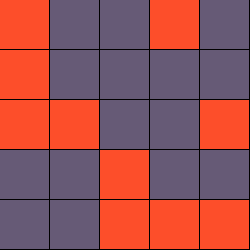

In [513]:
def iter_matrix(matrix):
    max_y, max_x = matrix.shape
    for y in range(max_y):
        for x in range(max_x):
            yield x, y, matrix[y, x]
            
def show_matrix(matrix, scale=5):
    width, height = matrix.shape
    img = Image.new('RGB', (width * scale, height * scale))
    dot_size = max(1, scale - 2)
    draw = ImageDraw.Draw(img)
    for x, y, value in iter_matrix(matrix):
        box = (x*scale, y*scale, x*scale+dot_size, y*scale+dot_size)
        if value in [1, '#']:          
            color = "#fd4e2a"
        else:
            color = "#665a76"
        draw.rectangle(box, fill=color)
    return img
                
algorithm, matrix = load_input('20-sample.txt')            
display(show_matrix(matrix, scale=50))

In [514]:
def expand_area(x, y):
    for delta_y in range(-1, 2):
        for delta_x in range(-1, 2):
            yield x+delta_x, y+delta_y
            
assert list(expand_area(0, 0)) == [
    (-1, -1),
    (0, -1),
    (1, -1),
    (-1, 0),
    (0, 0),
    (1, 0),
    (-1, 1),
    (0, 1),
    (1, 1),    
]

So, to determine the value of the pixel at `(5,10)` in the output image, nine pixels from the input image need to be considered: `(4,9)`, `(4,10)`, `(4,11)`, `(5,9)`, `(5,10)`, `(5,11)`, `(6,9)`, `(6,10)`, and `(6,11)`.

In [515]:
list(expand_area(5, 10))

[(4, 9), (5, 9), (6, 9), (4, 10), (5, 10), (6, 10), (4, 11), (5, 11), (6, 11)]

In [516]:
assert set(expand_area(5, 10)) == set([
    (4, 9),
    (4, 10),
    (4, 11),
    (5, 9),
    (5, 10),
    (5, 11),
    (6, 9),
    (6, 10),
    (6, 11),    
])

In [567]:
def read_enhanced_value(matrix, x, y):
    # print(f'Analysing {x}, {y}')
    buff = []
    width, height = matrix.shape
    for (_x, _y) in get_area(x, y):
        # print(f' _x is {_x} _y is {_y}', end=' ')
        if _x < 0 or _x >= width or _y < 0 or _y >= height:
            buff.append('0')
            # print('0*', end=" ")
        else:
            if matrix[_x][_y] != 0:
                buff.append('1')
                # print('1', end=" ")
            else:
                buff.append('0')
                # print('0', end=" ")
    assert len(buff) == 9
    s_byte = ''.join(buff)
    print('[', s_byte, ']', int(s_byte, 2))
    return int(s_byte, 2)
        
m = np.array([
    [1, 0, 0, 1, 0],
    [1, 0, 0, 0, 0],
    [1, 1, 0, 0, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 1, 1],
]).transpose()  # Numpy uses y, x

assert read_enhanced_value(m, -1, -1) == 1
assert read_enhanced_value(m, 5, -1) == 0
assert read_enhanced_value(m, -1, 5) == 0
assert read_enhanced_value(m, 5, 5) == 256
assert read_enhanced_value(m, 3, 5) == 448
assert read_enhanced_value(m, 2, 5) == 192
assert read_enhanced_value(m, 2, 2) == 34
assert read_enhanced_value(m, 1, 1) == 294
assert read_enhanced_value(m, 0, 0) == 18
assert read_enhanced_value(m, 4, 4) == 48
assert read_enhanced_value(m, 4, 0) == 32

[ 000000001 ] 1
[ 000000000 ] 0
[ 000000000 ] 0
[ 100000000 ] 256
[ 111000000 ] 448
[ 011000000 ] 192
[ 000100010 ] 34
[ 100100110 ] 294
[ 000010010 ] 18
[ 000110000 ] 48
[ 000100000 ] 32


In [568]:
m = np.array(range(9)).reshape(3, 3)
m[-1][-1] = -120
m

array([[   0,    1,    2],
       [   3,    4,    5],
       [   6,    7, -120]])

In [569]:
def enhance(matrix, algorithm):
    height, width = matrix.shape
    result =  np.zeros((height+2, width+2), int)
    print('shapes: ', matrix.shape, result.shape)
    for x, y, _ in iter_matrix(result):
        byte_index = read_enhanced_value(matrix, x-1, y-1)
        new_bit = algorithm[byte_index]
        tron = True
        if tron:
            print(f"{x},{y} new bit is {new_bit} for position {byte_index}")
        result[x][y] = int(new_bit)
    # print()
    return result.transpose()

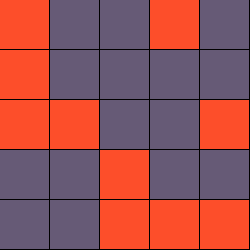

shapes:  (5, 5) (7, 7)
[ 000000001 ] 1
0,0 new bit is 0 for position 1
[ 000000011 ] 3
1,0 new bit is 0 for position 3
[ 000000111 ] 7
2,0 new bit is 1 for position 7
[ 000000110 ] 6
3,0 new bit is 0 for position 6
[ 000000100 ] 4
4,0 new bit is 1 for position 4
[ 000000000 ] 0
5,0 new bit is 0 for position 0
[ 000000000 ] 0
6,0 new bit is 0 for position 0
[ 000001000 ] 8
0,1 new bit is 1 for position 8
[ 000011000 ] 24
1,1 new bit is 1 for position 24
[ 000111001 ] 57
2,1 new bit is 1 for position 57
[ 000110010 ] 50
3,1 new bit is 1 for position 50
[ 000100100 ] 36
4,1 new bit is 0 for position 36
[ 000000000 ] 0
5,1 new bit is 0 for position 0
[ 000000000 ] 0
6,1 new bit is 0 for position 0
[ 001000000 ] 64
0,2 new bit is 0 for position 64
[ 011000000 ] 192
1,2 new bit is 1 for position 192
[ 111001000 ] 456
2,2 new bit is 1 for position 456
[ 110010001 ] 401
3,2 new bit is 1 for position 401
[ 100100011 ] 291
4,2 new bit is 0 for position 291
[ 000000110 ] 6
5,2 new bit is 0 for po

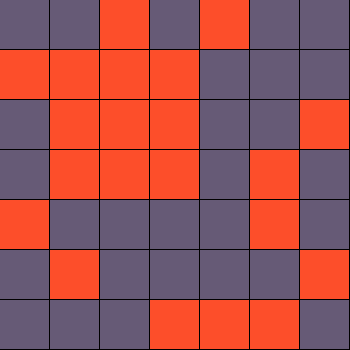

In [570]:
a, m = load_input('20-sample.txt')   
display(show_matrix(m, scale=50))
m = enhance(m, a)
display(show_matrix(m, scale=50))

In [558]:
algorithm, matrix = load_input('20-sample.txt')   
matrix = enhance(matrix, algorithm)
matrix = enhance(matrix, algorithm)
assert matrix.sum() == 35

shapes:  (5, 5) (7, 7)
0,0 new bit is 0 for position 1
1,0 new bit is 0 for position 3
2,0 new bit is 1 for position 7
3,0 new bit is 0 for position 6
4,0 new bit is 1 for position 4
5,0 new bit is 0 for position 0
6,0 new bit is 0 for position 0


IndexError: index 7 is out of bounds for axis 0 with size 7

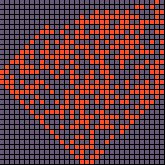

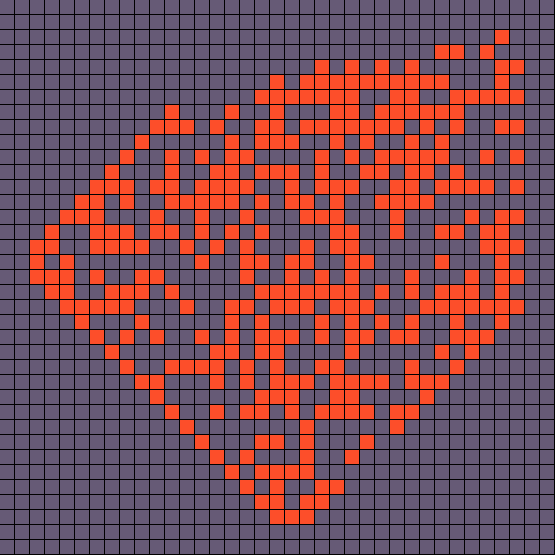

In [412]:
algorithm, matrix = load_input('20-sample.txt')   
for _ in range(14):
    matrix = enhance(matrix, algorithm)
display(show_matrix(matrix, scale=5))
matrix = np.pad(matrix, 2, constant_values=0)
display(show_matrix(matrix, scale=15))

## Solution part one

In [378]:
algorithm, matrix = load_input('20-input.txt')
assert len(algorithm) == 512
assert matrix.shape == (100, 100)

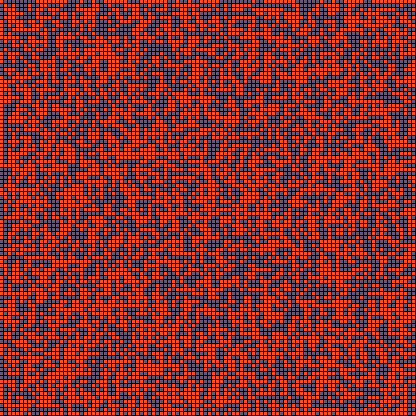

(104, 104)
Solution part one: 5619


In [415]:
algorithm, matrix = load_input('20-input.txt')
matrix = enhance(matrix, algorithm)
matrix = enhance(matrix, algorithm)
display(show_matrix(matrix, scale=4))
print(matrix.shape)
sol = matrix.sum()
print(f'Solution part one: {sol}')


In [416]:
matrix[0:10][0:10]

array([[1, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 0, 0]])

19


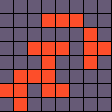

In [491]:
import numpy as np

input_files = ["20-sample-3.txt", "20-input.txt"]

with open(input_files[0], 'r') as f:
    data =  [a.strip() for a in f.readlines()]

iea = data[0]
image = np.array([list(x) for x in data[2:]])
outside = '.'


def get_char(grid):
    flat = grid.flatten()
    flat[flat == "."] = 0
    flat[flat == "#"] = 1

    bitstring = "".join(flat)
    value = int(bitstring, 2)

    return iea[value]

def step(img, outside, iea=iea):
    img = np.pad(img, 2, 'constant', constant_values = outside)
    new_img = np.zeros((img.shape[0] - 2, img.shape[1] - 2), dtype=str)

    for y in range(new_img.shape[0]):
        for x in range(new_img.shape[1]):
            new_img[y][x] = get_char(img[y:y+3, x:x+3])

    return new_img

ITERATIONS = 2

def part1(image, outside):
    for i in range(ITERATIONS):
        image = step(image, outside)
        outside = get_char(np.array(list(outside*9)).reshape((3,3)))

    print(np.count_nonzero(image == "#"))
    return image

i = part1(image, outside)
i.shape
display(show_matrix(i.transpose(), scale=14))

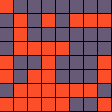

In [492]:
algorithm, matrix = load_input('20-sample-3.txt')
for _ in range(ITERATIONS):
    matrix = enhance(matrix, algorithm)
display(show_matrix(matrix, scale=14))

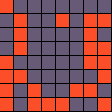

In [490]:
display(show_matrix((matrix == 1) !=  (i.transpose() == '#'), scale=14))